# Import required libraries and loading the data

In [1]:
pip install mat73

In [2]:
from tensorflow import keras
from tensorflow.keras import optimizers, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Input, LeakyReLU
from sklearn.metrics import classification_report
from mat73 import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
DIR = 'drive/My Drive/datasets/pub_dataset1.mat'

In [5]:
mat = loadmat(DIR)

In [6]:
print(list(mat.keys()))

['D', 'H', 'data_te', 'data_tr']


In [7]:
mat['data_te'].shape

(17629, 55)

In [8]:
mat['data_tr'].shape

(1751, 55)

In [9]:
train_X = mat['data_tr'][:, :-1]
train_y = mat['data_tr'][:, -1]

In [10]:
test_X = mat['data_te'][:, :-1]
test_y = mat['data_te'][:, -1]

In [11]:
print("count of zeros in train dataset: ",np.count_nonzero(train_y==0))
print("count of ones in train dataset: ",np.count_nonzero(train_y==1))

count of zeros in train dataset:  794
count of ones in train dataset:  957


In [12]:
train_X.shape[1]

54

# MLP

In [13]:
model = Sequential(name='MLP')
model.add(Dense(10, input_dim=train_X.shape[1], kernel_initializer='random_normal', activation='relu'))
model.add(Dense(1, kernel_initializer='random_normal', activation='sigmoid'))
model.summary()

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                550       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


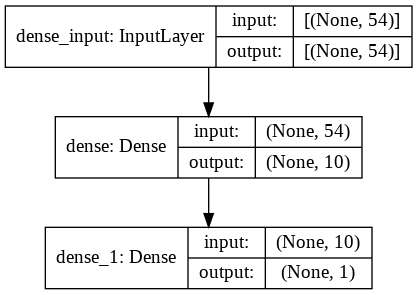

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(train_X, train_y, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
88/88 [==============================] - 3s 8ms/step - loss: 1.0882 - accuracy: 0.7398 - val_loss: 0.2016 - val_accuracy: 0.9459
Epoch 2/50
88/88 [==============================] - 0s 3ms/step - loss: 0.1887 - accuracy: 0.9429 - val_loss: 0.1589 - val_accuracy: 0.9459
Epoch 3/50
88/88 [==============================] - 0s 4ms/step - loss: 0.1601 - accuracy: 0.9386 - val_loss: 0.1533 - val_accuracy: 0.9316
Epoch 4/50
88/88 [==============================] - 0s 3ms/step - loss: 0.1366 - accuracy: 0.9536 - val_loss: 0.1096 - val_accuracy: 0.9601
Epoch 5/50
88/88 [==============================] - 0s 4ms/step - loss: 0.1215 - accuracy: 0.9592 - val_loss: 0.0940 - val_accuracy: 0.9630
Epoch 6/50
88/88 [==============================] - 0s 4ms/step - loss: 0.1138 - accuracy: 0.9604 - val_loss: 0.0989 - val_accuracy: 0.9544
Epoch 7/50
88/88 [==============================] - 0s 4ms/step - loss: 0.1114 - accuracy: 0.9544 - val_loss: 0.0748 - val_accuracy: 0.9744
Epoch 8/50
88/88 [==

In [17]:
model.evaluate(test_X,test_y)

551/551 [==============================] - 1s 2ms/step - loss: 0.0087 - accuracy: 0.9982


[0.008656411431729794, 0.9982415437698364]

In [18]:
print(classification_report(test_y,model.predict_classes(test_X)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7869
         1.0       1.00      1.00      1.00      9760

    accuracy                           1.00     17629
   macro avg       1.00      1.00      1.00     17629
weighted avg       1.00      1.00      1.00     17629



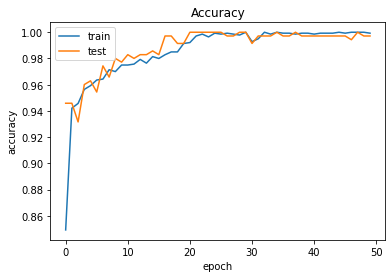

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

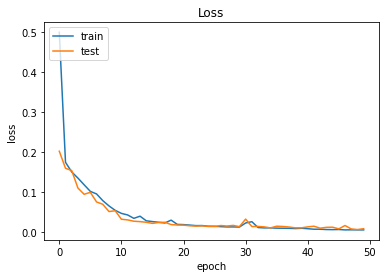

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# MlP-2

In [21]:
from tensorflow.keras import regularizers

In [22]:
model = Sequential(name='MLP')
model.add(Dense(32, input_dim=train_X.shape[1], kernel_initializer='he_normal', activation='relu', kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(Dense(32, input_dim=train_X.shape[1], kernel_initializer='he_normal', activation='relu', kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))
model.summary()

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                1760      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 3,105
Trainable params: 2,977
Non-trainable params: 128
_________________________________________________________________


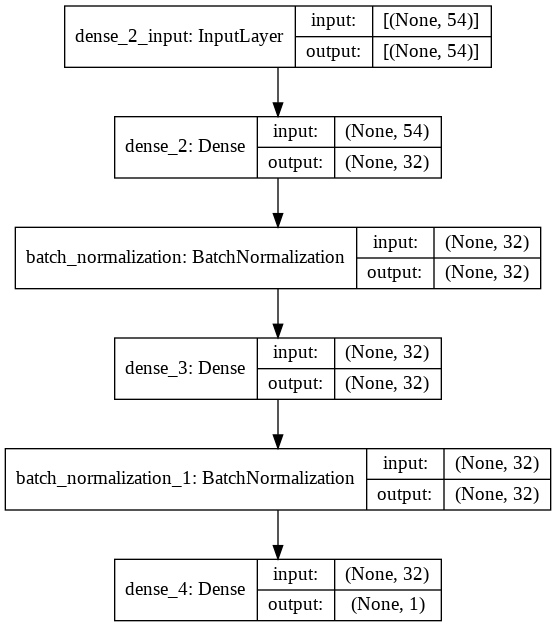

In [23]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(train_X, train_y, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
88/88 [==============================] - 2s 8ms/step - loss: 0.4702 - accuracy: 0.7713 - val_loss: 0.4887 - val_accuracy: 0.6838
Epoch 2/50
88/88 [==============================] - 0s 5ms/step - loss: 0.1281 - accuracy: 0.9707 - val_loss: 0.1780 - val_accuracy: 0.9972
Epoch 3/50
88/88 [==============================] - 0s 5ms/step - loss: 0.0639 - accuracy: 0.9909 - val_loss: 0.0514 - val_accuracy: 0.9972
Epoch 4/50
88/88 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 0.9977 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 5/50
88/88 [==============================] - 0s 5ms/step - loss: 0.0331 - accuracy: 0.9915 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 6/50
88/88 [==============================] - 0s 5ms/step - loss: 0.0282 - accuracy: 0.9981 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 7/50
88/88 [==============================] - 0s 5ms/step - loss: 0.0178 - accuracy: 0.9975 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 8/50
88/88 [==

In [26]:
model.evaluate(test_X,test_y)

551/551 [==============================] - 1s 2ms/step - loss: 0.0015 - accuracy: 0.9998


[0.0015483720926567912, 0.9997730851173401]

In [27]:
print(classification_report(test_y,model.predict_classes(test_X)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7869
         1.0       1.00      1.00      1.00      9760

    accuracy                           1.00     17629
   macro avg       1.00      1.00      1.00     17629
weighted avg       1.00      1.00      1.00     17629



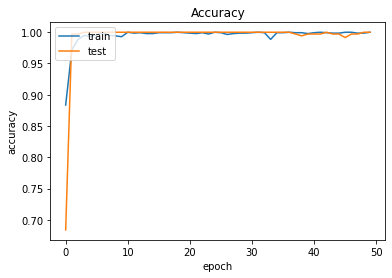

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

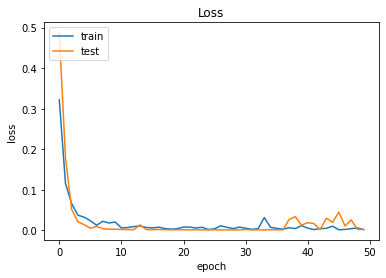

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Autoencoder 

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
# scale data
t = MinMaxScaler()
t.fit(train_X)
train_X = t.transform(train_X)
test_X = t.transform(test_X)

In [32]:
# define encoder
visible = Input(shape=(train_X.shape[1],))
# encoder level 1
e = Dense(train_X.shape[1]*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(train_X.shape[1])(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = float(train_X.shape[1]) / 2.0
bottleneck = Dense(n_bottleneck)(e)

In [33]:
# define decoder, level 1
d = Dense(train_X.shape[1])(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(train_X.shape[1]*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(train_X.shape[1], activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [34]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

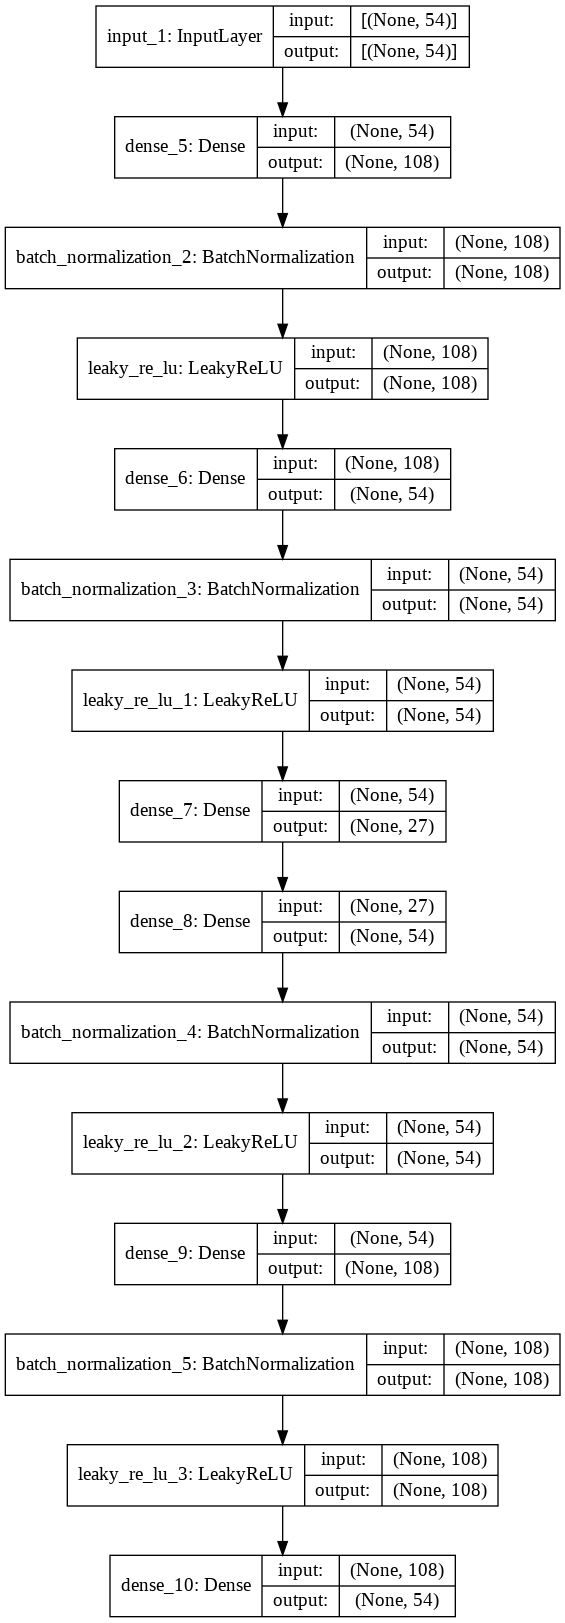

In [36]:
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

In [37]:
# fit the autoencoder model to reconstruct input
history = model.fit(train_X, train_X, epochs=100, batch_size=16, verbose=2, validation_split=0.2)

Epoch 1/100
88/88 - 2s - loss: 0.1364 - val_loss: 0.0516
Epoch 2/100
88/88 - 0s - loss: 0.0208 - val_loss: 0.0275
Epoch 3/100
88/88 - 0s - loss: 0.0150 - val_loss: 0.0149
Epoch 4/100
88/88 - 1s - loss: 0.0118 - val_loss: 0.0087
Epoch 5/100
88/88 - 0s - loss: 0.0102 - val_loss: 0.0078
Epoch 6/100
88/88 - 1s - loss: 0.0097 - val_loss: 0.0069
Epoch 7/100
88/88 - 0s - loss: 0.0096 - val_loss: 0.0052
Epoch 8/100
88/88 - 1s - loss: 0.0087 - val_loss: 0.0056
Epoch 9/100
88/88 - 1s - loss: 0.0083 - val_loss: 0.0056
Epoch 10/100
88/88 - 1s - loss: 0.0082 - val_loss: 0.0046
Epoch 11/100
88/88 - 1s - loss: 0.0075 - val_loss: 0.0050
Epoch 12/100
88/88 - 0s - loss: 0.0076 - val_loss: 0.0046
Epoch 13/100
88/88 - 1s - loss: 0.0070 - val_loss: 0.0038
Epoch 14/100
88/88 - 0s - loss: 0.0071 - val_loss: 0.0046
Epoch 15/100
88/88 - 1s - loss: 0.0069 - val_loss: 0.0040
Epoch 16/100
88/88 - 1s - loss: 0.0067 - val_loss: 0.0035
Epoch 17/100
88/88 - 1s - loss: 0.0064 - val_loss: 0.0036
Epoch 18/100
88/88 - 0s

In [38]:
score = model.evaluate(test_X, test_y)

551/551 [==============================] - 2s 3ms/step - loss: 0.4865


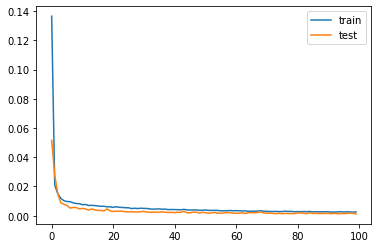

In [39]:
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [40]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 54)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 108)               5940      
_________________________________________________________________
batch_normalization_2 (Batch (None, 108)               432       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 108)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 54)                5886      
_________________________________________________________________
batch_normalization_3 (Batch (None, 54)                216       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 54)                0     

In [41]:
hidden_representation = Sequential() 
hidden_representation.add(model.layers[0]) 
hidden_representation.add(model.layers[1]) 
hidden_representation.add(model.layers[2]) 
hidden_representation.add(model.layers[3]) 
hidden_representation.add(model.layers[4]) 
hidden_representation.add(model.layers[5]) 
hidden_representation.add(model.layers[6]) 
hidden_representation.add(model.layers[7])

In [42]:
test_X.shape

(17629, 54)

In [43]:
test_y.shape

(17629,)

In [44]:
hidden_representation.predict(test_X).shape

(17629, 27)

In [45]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 

In [46]:
# Building the logistic regression model 

lrclf = LogisticRegression() 
lrclf.fit(hidden_representation.predict(train_X), train_y) 

  
# Storing the predictions of the linear model 

y_pred_lrclf = lrclf.predict(hidden_representation.predict(test_X)) 

  
# Evaluating the performance of the linear model 

print('Accuracy : '+str(accuracy_score(test_y, y_pred_lrclf))) 

Accuracy : 1.0


In [47]:
print(classification_report(test_y,lrclf.predict(hidden_representation.predict(test_X))))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7869
         1.0       1.00      1.00      1.00      9760

    accuracy                           1.00     17629
   macro avg       1.00      1.00      1.00     17629
weighted avg       1.00      1.00      1.00     17629



In [48]:
# Building the SVM model 

svmclf = SVC() 
svmclf.fit(hidden_representation.predict(train_X), train_y) 

  
# Storing the predictions of the non-linear model 

y_pred_svmclf = svmclf.predict(hidden_representation.predict(test_X)) 

  
# Evaluating the performance of the non-linear model 

print('Accuracy : '+str(accuracy_score(test_y, y_pred_svmclf))) 

Accuracy : 1.0


In [49]:
print(classification_report(test_y,svmclf.predict(hidden_representation.predict(test_X))))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7869
         1.0       1.00      1.00      1.00      9760

    accuracy                           1.00     17629
   macro avg       1.00      1.00      1.00     17629
weighted avg       1.00      1.00      1.00     17629



In [50]:
model = Sequential()
model.add(Dense(10, input_dim=hidden_representation.predict(train_X).shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
history = model.fit(hidden_representation.predict(train_X), train_y, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
88/88 [==============================] - 1s 5ms/step - loss: 0.9686 - accuracy: 0.5167 - val_loss: 0.4601 - val_accuracy: 0.8091
Epoch 2/50
88/88 [==============================] - 0s 3ms/step - loss: 0.3881 - accuracy: 0.8554 - val_loss: 0.2477 - val_accuracy: 0.9402
Epoch 3/50
88/88 [==============================] - 0s 4ms/step - loss: 0.1979 - accuracy: 0.9695 - val_loss: 0.1511 - val_accuracy: 0.9772
Epoch 4/50
88/88 [==============================] - 0s 4ms/step - loss: 0.1284 - accuracy: 0.9783 - val_loss: 0.0992 - val_accuracy: 0.9943
Epoch 5/50
88/88 [==============================] - 0s 3ms/step - loss: 0.0836 - accuracy: 0.9897 - val_loss: 0.0697 - val_accuracy: 0.9943
Epoch 6/50
88/88 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9961 - val_loss: 0.0516 - val_accuracy: 0.9943
Epoch 7/50
88/88 [==============================] - 0s 4ms/step - loss: 0.0405 - accuracy: 0.9973 - val_loss: 0.0395 - val_accuracy: 0.9943
Epoch 8/50
88/88 [==

In [52]:
model.evaluate(hidden_representation.predict(test_X),test_y)

551/551 [==============================] - 1s 2ms/step - loss: 0.0012 - accuracy: 0.9998


[0.0012075959239155054, 0.9998298287391663]

In [53]:
print(classification_report(test_y,model.predict_classes(hidden_representation.predict(test_X))))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7869
         1.0       1.00      1.00      1.00      9760

    accuracy                           1.00     17629
   macro avg       1.00      1.00      1.00     17629
weighted avg       1.00      1.00      1.00     17629

